In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import report
import pbreport
import calibtools
import icalibtools

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['legend.fontsize']=20

In [3]:
AMAC='AMAC_B07'

In [4]:
r_amac=report.Report(AMAC)

In [5]:
r_pb=pbreport.Report('PB_'+AMAC)

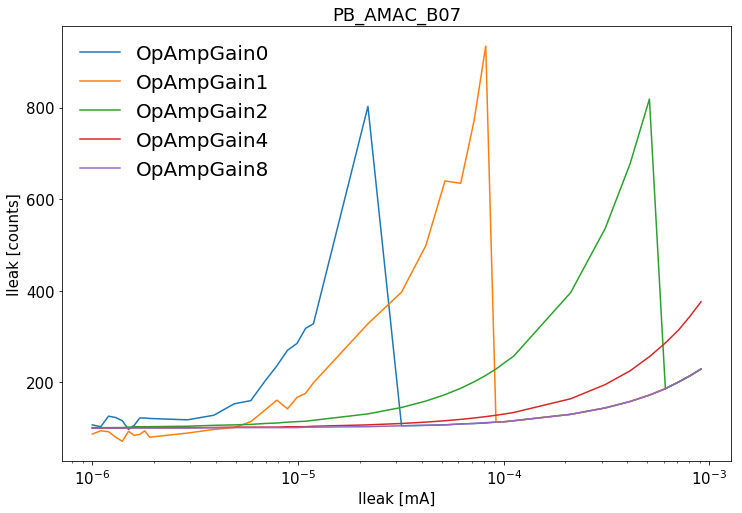

In [6]:
r_pb.render_ileak()

In [7]:
subdata=r_amac.icalib[(r_amac.icalib.Channel=='LEFT')&(r_amac.icalib.BandgapControl==10)&(r_amac.icalib.RampGain==3)]
icalib=icalibtools.calibrate(subdata,True)

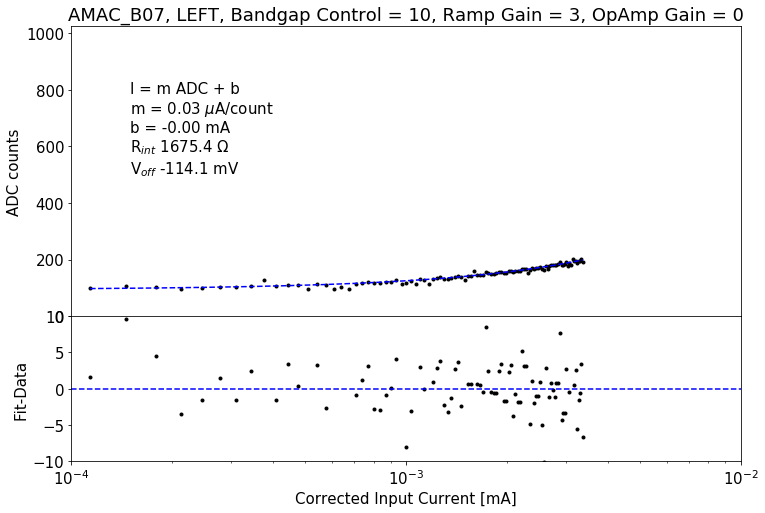

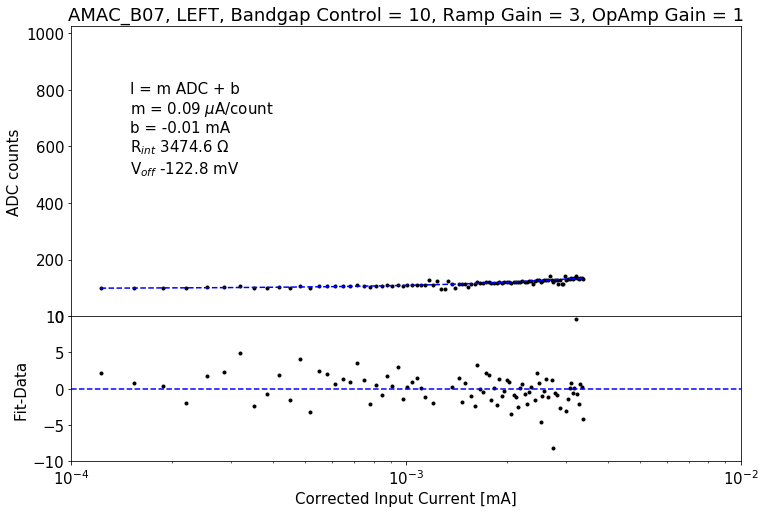

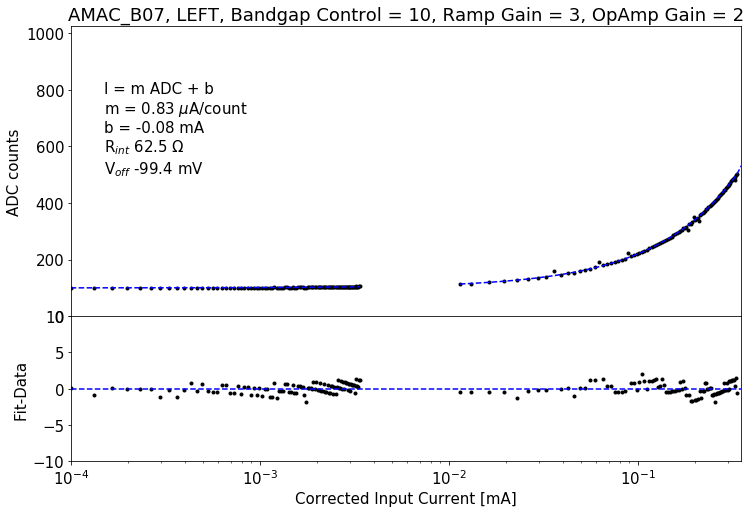

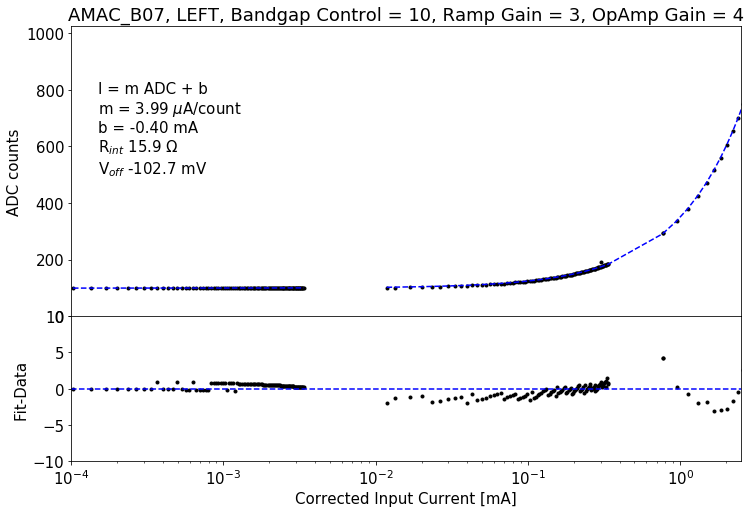

In [8]:
icalibtools.plot_calibration(subdata,icalib,None,10,3,0)
icalibtools.plot_calibration(subdata,icalib,None,10,3,1)
icalibtools.plot_calibration(subdata,icalib,None,10,3,2)
icalibtools.plot_calibration(subdata,icalib,None,10,3,4)

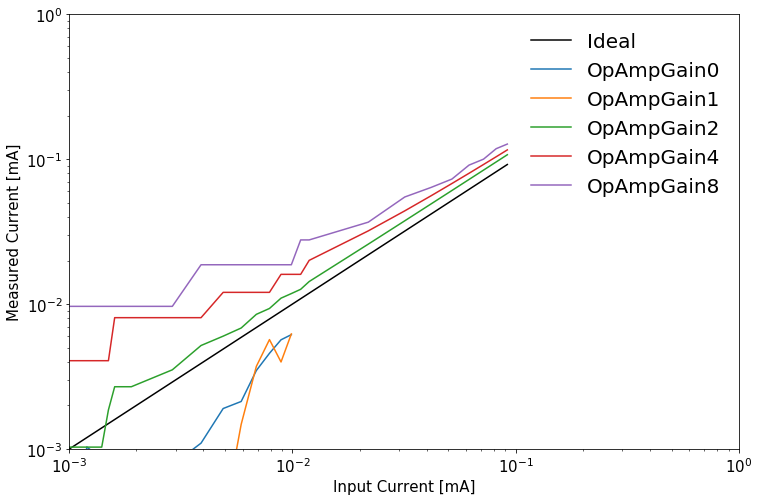

In [9]:
plt.loglog(r_pb.ileak.Ileak*1e3,r_pb.ileak.Ileak*1e3,'-k',label='Ideal')

for oa in [0,1,2,4,8]:
    subdata=r_pb.ileak[r_pb.ileak.Ileak<icalibtools.ILIMITS.get(int(oa/2))]
    leak=icalibtools.convert(subdata['OpAmpGain%d'%oa],icalib,BG=10,RG=3,OA=oa,Channel='LEFT')
    plt.loglog(subdata.Ileak*1e3,leak*1e3,'-',label='OpAmpGain%d'%oa)

plt.xlim([1e-3,1])
plt.ylim([1e-3,1])
plt.legend(frameon=False)
plt.xlabel('Input Current [mA]')
plt.ylabel('Measured Current [mA]')